In [23]:
import time, random, numpy as np, matplotlib.pyplot as plt, multiprocessing as mp

In [24]:
def plot_grafic(x:np.array,y:np.array):
    inside_circle = x**2 + y**2 <= 1
    fig, ax = plt.subplots(figsize = (5,5))
    
    # Puntos
    ax.plot(x[inside_circle],y[inside_circle],'o',color = 'green',label = 'Inside Circle')
    ax.plot(x[~inside_circle],y[~inside_circle],'o',color = 'blue',label = 'Outside Circle')

    # Circulo
    circle = plt.Circle((0,0),1,color = 'black',fill = False,linewidth = 2)
    ax.add_artist(circle)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

    ax.legend(loc = 'upper right')

    plt.show()

    plt.close()

def estimate_python(N_T:int = 10_000):
    ex_time = time.time()

    N_in = 0
    for _ in range(N_T):
        x, y = random.uniform(0,1), random.uniform(0,1)
        if x**2 + y**2 <= 1:
            N_in += 1
    pi_estimate = (N_in / N_T) * 4

    ex_time = time.time() - ex_time


    return (pi_estimate, ex_time)

def estimate_numpy(N_T:int = 10_000):

    ex_time = time.time()

    x = np.random.uniform(0,1,N_T)
    y = np.random.uniform(0,1,N_T)
    N_in = np.sum(x**2 + y**2 <= 1)
    pi_estimate = (N_in / N_T) * 4

    ex_time = time.time() - ex_time

    # plot_grafic(x,y)

    return (pi_estimate, ex_time)

In [25]:
py_est, py_time = estimate_python()
np_est, np_time = estimate_numpy()

## Multiprocessing

In [26]:
def estimate_block_mp(N_P):
    N_in = 0
    for _ in range(N_P):
        x, y = random.uniform(0,1), random.uniform(0,1)
        if x**2 + y**2 <= 1:
            N_in += 1
    return N_in

def estimate_mp(N_T:int = 10_000):
    ex_time = time.time()

    N_parallel_blocks  = 4
    pool               = mp.Pool(processes = N_parallel_blocks)
    samples_per_worker = [N_T // N_parallel_blocks] * N_parallel_blocks
    counts             = pool.map(estimate_block_mp,samples_per_worker)
    pi_estimate        = 4 * sum(counts) / N_T

    ex_time = time.time() - ex_time

    return pi_estimate, ex_time

In [27]:
def estimate_block_mp_np(N_P):
    x = np.random.uniform(0,1,N_P)
    y = np.random.uniform(0,1,N_P)
    N_in =np.sum(x**2 + y**2 <= 1)
    return N_in

def estimate_mp_np(N_T:int = 10_000):
    ex_time = time.time()

    N_parallel_blocks  = 4
    pool               = mp.Pool(processes = N_parallel_blocks)
    samples_per_worker = [N_T // N_parallel_blocks] * N_parallel_blocks
    counts             = pool.map(estimate_block_mp_np,samples_per_worker)
    pi_estimate        = 4 * sum(counts) / N_T

    ex_time = time.time() - ex_time

    return pi_estimate, ex_time

In [28]:
mp_est, mp_time = estimate_mp()
mp_np_est, mp_np_time = estimate_mp_np()

## Results

0.01404118537902832 0.0014200210571289062 0.06565713882446289 0.05671405792236328


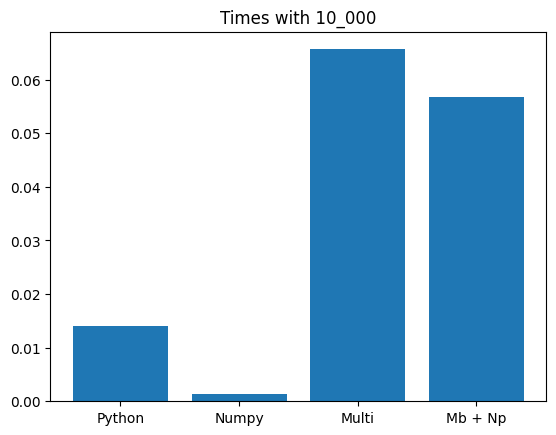

In [29]:
print(py_time,np_time,mp_time,mp_np_time)
plt.bar(['Python','Numpy','Multi','Mb + Np'],[py_time,np_time,mp_time,mp_np_time])
plt.title('Times with 10_000')
plt.show()
plt.close()

### Tasks

In [30]:
problem_sizes = [10**i for i in range(1,8)]
py_times = []
np_times = []
mp_times = []
mp_np_times = []


for N_T in problem_sizes:

    py_time_avg    = 0
    np_time_avg    = 0
    mp_time_avg    = 0
    mp_np_time_avg = 0

    for _ in range(5):
        py_est, py_time = estimate_python(N_T)
        np_est, np_time = estimate_numpy(N_T)
        mp_est, mp_time = estimate_mp(N_T)
        mp_np_est, mp_np_time = estimate_mp_np(N_T)

        py_time_avg    += py_time
        np_time_avg    += np_time
        mp_time_avg    += mp_time
        mp_np_time_avg += mp_np_time

    py_time_avg    /= 5
    np_time_avg    /= 5
    mp_time_avg    /= 5
    mp_np_time_avg /= 5


    py_times.append(py_time_avg)
    np_times.append(np_time_avg)
    mp_times.append(mp_time_avg)
    mp_np_times.append(mp_np_time_avg)



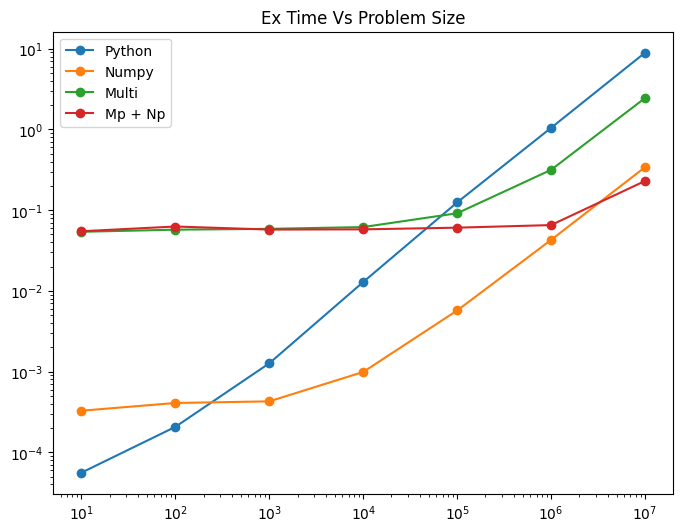

In [31]:
plt.figure(figsize=(8,6))
plt.plot(problem_sizes, py_times,    marker = 'o', linestyle = '-', label = 'Python')
plt.plot(problem_sizes, np_times,    marker = 'o', linestyle = '-', label = 'Numpy')
plt.plot(problem_sizes, mp_times,    marker = 'o', linestyle = '-', label = 'Multi')
plt.plot(problem_sizes, mp_np_times, marker = 'o', linestyle = '-', label = 'Mp + Np')
plt.xscale('log')
plt.yscale('log')
plt.title('Ex Time Vs Problem Size')
plt.legend()
plt.show()